## Impact of Surface Brightness


In [1]:
%pylab inline
import matplotlib.gridspec as gridspec
from astropy.table import Table,Column
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import os
import scipy.stats.distributions as dist

from PIL import Image
import urllib, cStringIO
import random

#function for getting galaxy images
def get_image_from_url(url):

    file = cStringIO.StringIO(urllib.urlopen(url).read())
    img = Image.open(file)
    return img


mpl.rcParams['text.usetex']=True
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 


Populating the interactive namespace from numpy and matplotlib


In [3]:
#load the data - #70,198 galaxies matched between COSMOS and UV
data=Table.read('../data/cosmos_uv_matched_catalog.fits')

#load cut values from red_disk_sample: 
cuts=Table.read('../data/red_disk_cuts.fits')

#GZH vote fractions
p_features = 't01_smooth_or_features_a02_features_or_disk_best_fraction'
p_clumpy_no = 't12_clumpy_a02_no_weighted_fraction'
p_edgeon_no = 't02_edgeon_a02_no_weighted_fraction'
N_edgeon = 't02_edgeon_total_weight'

#define disk sample
disks = (data[p_features]>cuts['p_features_cut']) & (data[p_clumpy_no]>cuts['p_clumpy_no_cut']) & (data[p_edgeon_no]>cuts['p_edgeon_no_cut']) & (data[N_edgeon]>=cuts['N_edgeon_cut']) & (data['Z_BEST']>cuts['z_lower']) & (data['Z_BEST']<=cuts['z_upper']) & (data['MR']<cuts['mag_cut'])

print 'Number of disks: %s'%len(data[disks])

#define red sequence
red_sequence = (data['classification']==0)
blue_cloud = (data['classification']==1)

Number of disks: 8843


## The thought is that SB cut is necessary since we can't be confident in vote fractions of galaxies with SB below some limit. Check some images. 

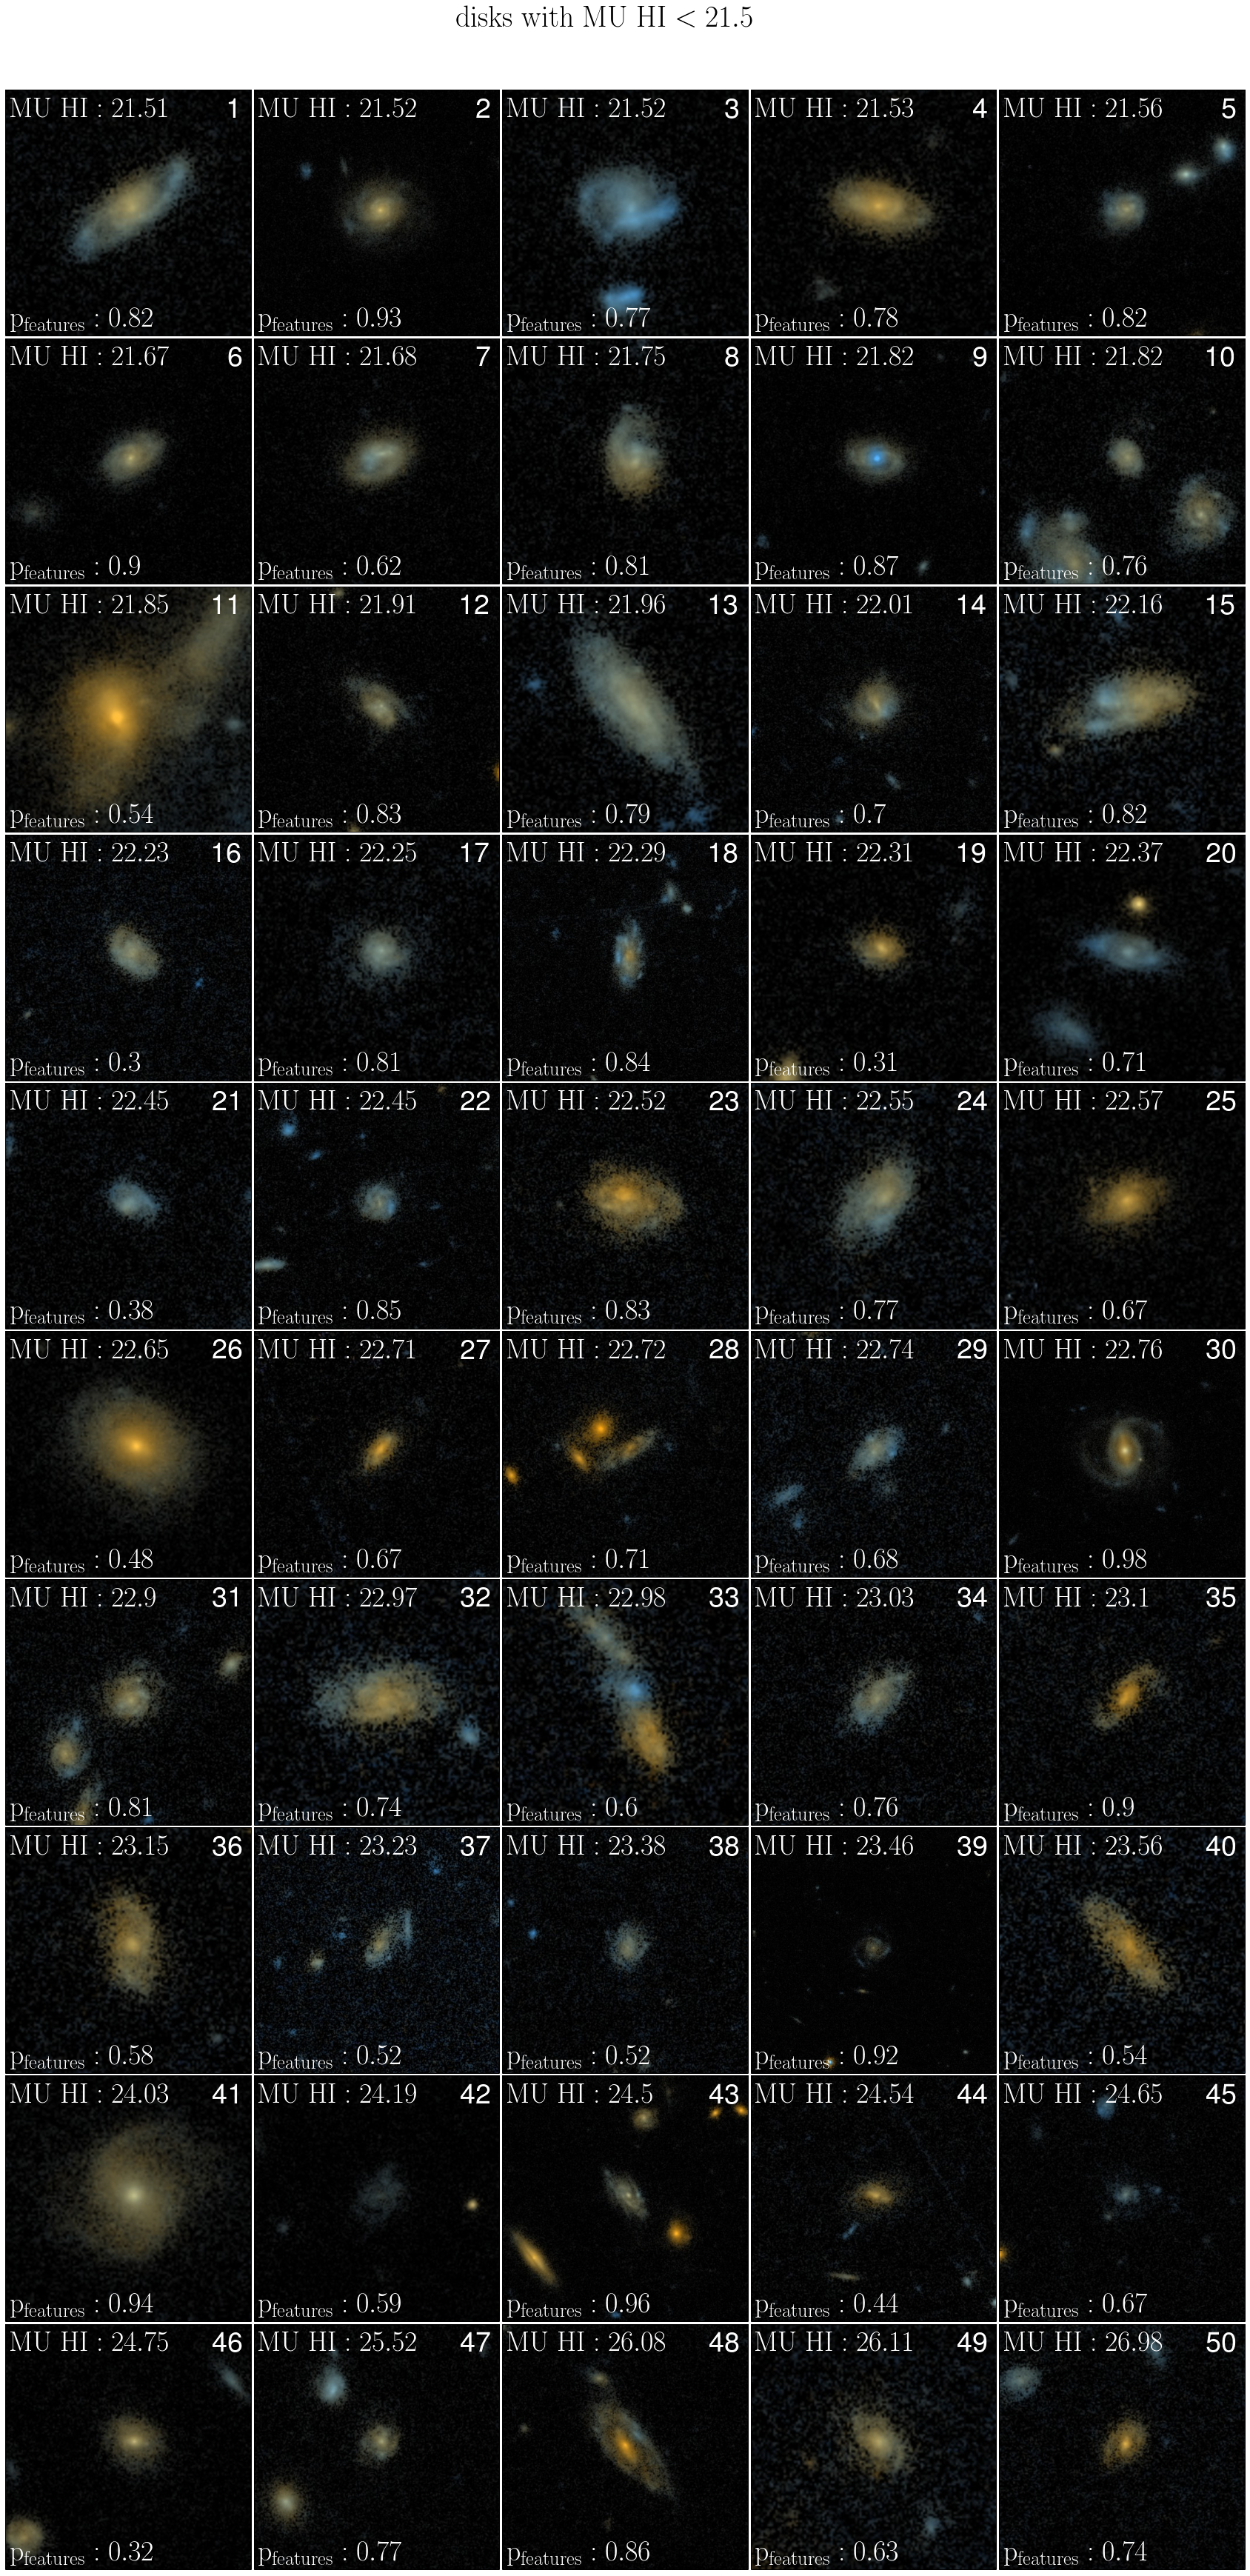

In [6]:
gs=gridspec.GridSpec(10,5)
gs.update(wspace=0.01)
gs.update(hspace=0.01)
 
sb_cut = 21.5
low_sb = (data['MU_HI']>sb_cut)
    
these_data=data[disks & low_sb]

if len(these_data) < 20:
    print 'try new values'

#shuffle which galaxies get displayed     
n_list=np.linspace(0,len(these_data)-1,len(these_data))
random.seed(3)
random.shuffle(n_list)

#how many galaxies to display?
n_gals = 50
random_n_list = n_list[0:n_gals]

random_gal_list = []
for n in random_n_list:
    random_gal_list.append(these_data[int(n)])
    
labels = np.linspace(1,50,50)

#now we have a random list of galaxies - sort them by mu_hi, column 719
random_gal_list.sort(key=itemgetter(179))

f=plt.figure(figsize=(30,60))
n=0
for i in range (0,10):
    for j in range(0,5):
        ax=plt.subplot(gs[i,j])
        gal = random_gal_list[n] # random galaxy from big list 
        plt.imshow(get_image_from_url(gal['location']))
        plt.tick_params(labelbottom='off',labelleft='off')
        ax.annotate('$\mathrm{MU~HI: %s}$'%round(gal['MU_HI'],2),fontsize=38,xy=(0.02,.97),
            xycoords='axes fraction',verticalalignment='top',color='white')

        ax.annotate('$\mathrm{p_{features}: %s}$'%round(gal[p_features],2),fontsize=38,xy=(0.02,.02),
            xycoords='axes fraction',color='white')
        ax.annotate('%s'%int(labels[n]),fontsize=38,xy=(0.97,0.97),
            xycoords='axes fraction',verticalalignment='top',horizontalalignment='right',color='white')

        n+=1
        

f.text(.5,.92,'$\mathrm{disks~with~MU~HI<%s}$'%sb_cut, fontsize=40,ha='center')

Low SB disks surely look like disks - the problem is that we may not be complete since we may be missing disks in the sample which have low SB. To be complete, oh yeah we used the FERENGI corrections. duh. 